# Enfoque Clásico de series de tiempo.

**Estadistica Aplicada**

**Andrik Daniel Vazquez Regalado - 1905622**

**Sesión 12 - 16 marzo 2023**

En el enfoque clásico de series de tiempo, se considera que la serie tiene 4 componentes:

1. Tendencia
2. Ciclo
3. Estacional
4. Irregular Usualmente se considera que la tendencia y el ciclo vienen juntos por lo que se habla de la tendencia-ciclo (tendencia).


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Modelo ETS Error-Trend-Seasonally (Tendenciaciclo-estacional-Irregular)
from statsmodels.tsa.api import seasonal_decompose

In [4]:
## Datos
pasajeros_avion = pd.read_csv("https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv", index_col = "Month", parse_dates = True)

In [5]:
pasajeros_avion

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
pasajeros_avion = pasajeros_avion.rename(columns={"Thousands of Passengers":"miles de pasajeros"})

In [11]:
pasajeros_avion.head()

,miles de pasajeros
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
pasajeros_avion.index.freq = "MS"

In [14]:
pasajeros_avion.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

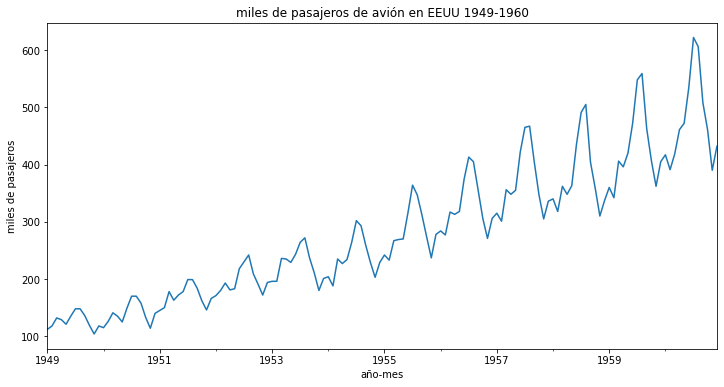

In [17]:
pasajeros_avion["miles de pasajeros"].plot(figsize=(12,6))
plt.title("miles de pasajeros de avión en EEUU 1949-1960")
plt.ylabel("miles de pasajeros")
plt.xlabel("año-mes");

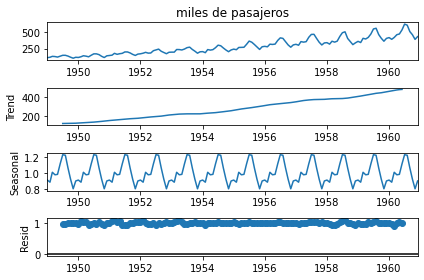

In [28]:
serie1 = seasonal_decompose(pasajeros_avion["miles de pasajeros"], model="multiplicative")
serie1.plot()
plt.show()

In [29]:
serie1.seasonal.head(12) #Cuando los valores son negativos quiere decir que los vuelos caen por debajo de lo normal y positivo que suben por arriba de lo normal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Freq: MS, Name: seasonal, dtype: float64

In [30]:
# destacionalizar
# Vamos a quitar el componente estacionario
pasajeros_avion["desestacionalizada"] = pasajeros_avion["miles de pasajeros"]/serie1.seasonal

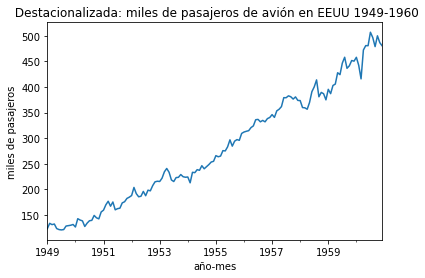

In [33]:
pasajeros_avion["desestacionalizada"].plot();
plt.title(" Destacionalizada: miles de pasajeros de avión en EEUU 1949-1960")
plt.ylabel("miles de pasajeros")
plt.xlabel("año-mes");

# COVID 19

In [34]:
confirmados_mex = pd.read_excel('covid_estados.xlsx')

In [35]:
confirmados_mex.head()

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [36]:
confirmados_mex["fecha"] = pd.to_datetime(confirmados_mex["fecha"])

In [37]:
pd.to_datetime(confirmados_mex["fecha"])

0      2020-02-26
1      2020-02-27
2      2020-02-28
3      2020-02-29
4      2020-03-01
          ...    
1109   2023-03-11
1110   2023-03-12
1111   2023-03-13
1112   2023-03-14
1113   2023-03-15
Name: fecha, Length: 1114, dtype: datetime64[ns]

In [38]:
confirmados_mex["fecha"] = pd.to_datetime(confirmados_mex["fecha"])

In [39]:
confirmados_mex = confirmados_mex.set_index("fecha")

In [40]:
confirmados_mex.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13',
               '2023-03-14', '2023-03-15'],
              dtype='datetime64[ns]', name='fecha', length=1114, freq=None)

In [41]:
confirmados_mex.index.freq = "D"

In [42]:
confirmados_mex.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13',
               '2023-03-14', '2023-03-15'],
              dtype='datetime64[ns]', name='fecha', length=1114, freq='D')

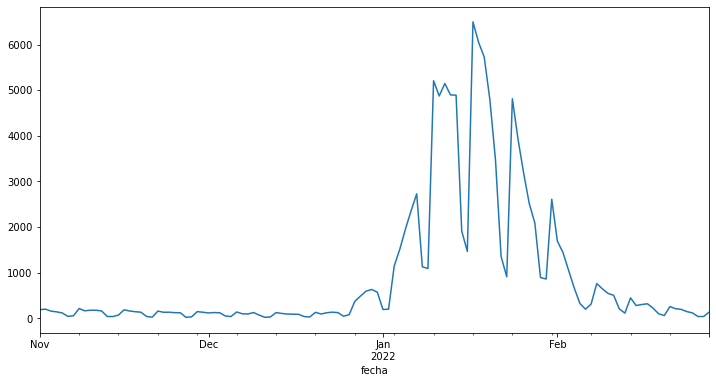

In [47]:
confirmados_mex["nuevo leon"].plot(figsize=(12,6))
plt.xlim("2021-11-01", "2022-02-28");


<AxesSubplot:xlabel='fecha'>

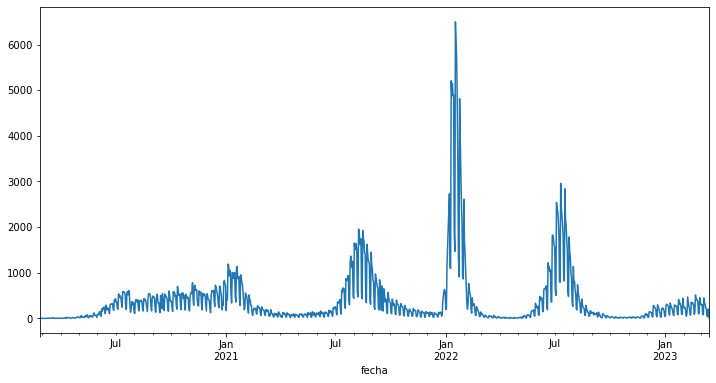

In [48]:
confirmados_mex["nuevo leon"].plot(figsize=(12,6))

In [49]:
serie2 = seasonal_decompose(confirmados_mex["nuevo leon"])

<AxesSubplot:xlabel='fecha'>

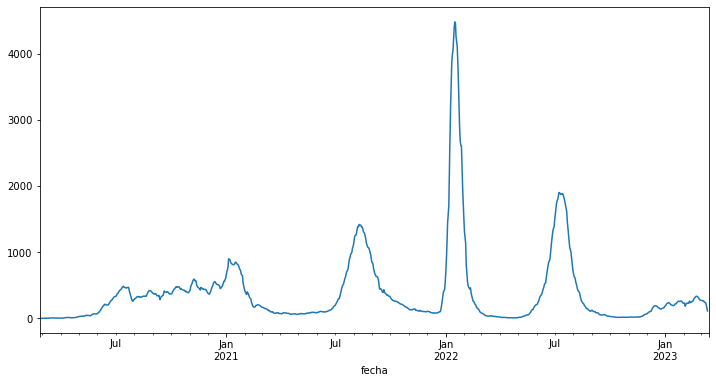

In [53]:
serie2.trend.plot(figsize=(12,6))